# Plotting a Detector Object

In this example we will make a few simple plots of the geometry of a detector object, handy for presentations or for visualizing your work.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import pyrex
import pyrex.custom.irex as irex

First we need to initialize the detector object and build its antennas. For this example we'll just use a basic station geometry. Since we won't be throwing any particles at it, the arguments of the antennas are largely unimportant, but we will set up the antennas to alternatingly be oriented vertically or horizontally.

In [2]:
detector = irex.StationGrid(stations=4, station_type=irex.RegularStation,
                            antennas_per_string=4, antenna_separation=10)
def alternating_orientation(index, antenna):
    if index%2==0:
        return ((0,0,1), (1,0,0))
    else:
        return ((1,0,0), (0,0,1))
detector.build_antennas(trigger_threshold=0,
                        orientation_scheme=alternating_orientation)

Let's also define a function which will highlight certain antennas in red. This one will highlight all antennas which are oriented horizontally.

In [3]:
def highlight(antenna_system):
    # Since the antennas in our detector are technically AntennaSystems,
    # to access the orientation we need to get the antenna object
    # which is a member of the AntennaSystem
    return np.dot(antenna_system.antenna.z_axis, (0,0,1)) == 0

For our first plot, let's make a 3-D image of the whole detector.

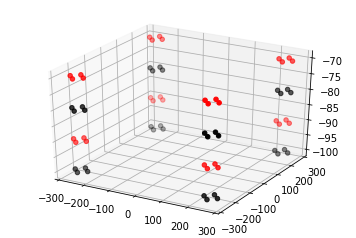

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the antennas which satisfy the highlight condition in red
xs = [ant.position[0] for ant in detector if highlight(ant)]
ys = [ant.position[1] for ant in detector if highlight(ant)]
zs = [ant.position[2] for ant in detector if highlight(ant)]
ax.scatter(xs, ys, zs, c="r")

# Plot the other antennas in black
xs = [ant.position[0] for ant in detector if not highlight(ant)]
ys = [ant.position[1] for ant in detector if not highlight(ant)]
zs = [ant.position[2] for ant in detector if not highlight(ant)]
ax.scatter(xs, ys, zs, c="k")

plt.show()

Now let's plot the detector in a couple different 2-D angles. First, a top-down view of the entire detector.

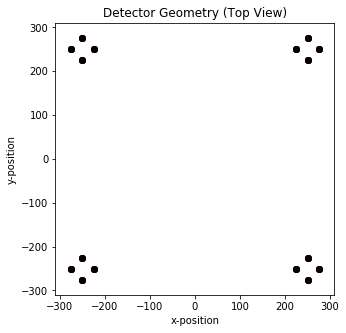

In [5]:
plt.figure(figsize=(5, 5))

xs = [ant.position[0] for ant in detector if highlight(ant)]
ys = [ant.position[1] for ant in detector if highlight(ant)]
plt.scatter(xs, ys, c="r")

xs = [ant.position[0] for ant in detector if not highlight(ant)]
ys = [ant.position[1] for ant in detector if not highlight(ant)]
plt.scatter(xs, ys, c="k")

plt.title("Detector Geometry (Top View)")
plt.xlabel("x-position")
plt.ylabel("y-position")
plt.show()

Next, let's take an x-z view of a single station. Let's also add in some string graphics by drawing lines from bottom antennas to the top of the ice.

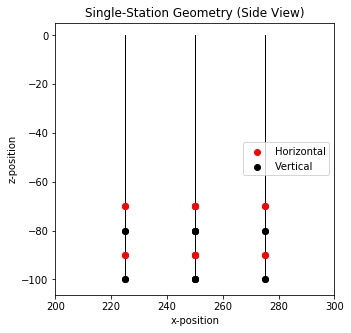

In [6]:
plt.figure(figsize=(5, 5))

for station in detector.subsets:
    for string in station.subsets:
        lowest_antenna = sorted(string.subsets,
                                key=lambda ant: ant.position[2])[0]
        plt.plot([lowest_antenna.position[0], lowest_antenna.position[0]],
                 [lowest_antenna.position[2], 0], c="k", lw=1, zorder=-1)

xs = [ant.position[0] for ant in detector if highlight(ant)]
zs = [ant.position[2] for ant in detector if highlight(ant)]
plt.scatter(xs, zs, c="r", label="Horizontal")

xs = [ant.position[0] for ant in detector if not highlight(ant)]
zs = [ant.position[2] for ant in detector if not highlight(ant)]
plt.scatter(xs, zs, c="k", label="Vertical")

plt.xlim(200, 300)
plt.title("Single-Station Geometry (Side View)")
plt.xlabel("x-position")
plt.ylabel("z-position")
plt.legend()
plt.show()